In this section we will use Plotly to make interactive plots. Please let us know if you have suggestions for new figures that could be made with Plotly.

In [1]:
# Run only if you are using the code from jupyter notebooks instead of pypi
try:
    import import_notebook
except ModuleNotFoundError:
    pass

In [4]:
import code_class as mut
from code_demo import demo_datasets
import numpy as np
import pandas as pd

importing Jupyter notebook from code_demo.ipynb


Load sample datasets.

In [5]:
data_dict = demo_datasets() # load example datasets
hras_enrichment_GAPGEF = data_dict['array_hras_GAPGEF']
hras_enrichment_RBD = data_dict['array_hras_RBD']

Create objects.

In [6]:
# Load enrichment scores. This is how you would load them from a local file.
hras_enrichment_GAPGEF = np.genfromtxt('../data/HRas166_GAPGEF.csv',
                                       delimiter=',')

hras_enrichment_RBD = np.genfromtxt('../data/HRas166_RBD.csv',
                                    delimiter=',')


# Define protein sequence
hras_sequence = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEY'\
                + 'SAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVES'\
                + 'RQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPG'

# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list('ACDEFGHIKLMNPQRSTVWY*')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = 2

# Define secondary structure
secondary = [['L0'], ['β1']*(9-1), ['L1']*(15-9), ['α1']*(25-15), ['L2']*(36-25),
             ['β2']*(46-36), ['L3']*(48-46), ['β3']*(58-48), ['L4'] * (64-58), 
             ['α2']*(74-64), ['L5']*(76-74), ['β4']*(83-76), ['L6']*(86-83), 
             ['α3']*(103-86), ['L7']*(110-103), ['β5']*(116-110), ['L8']*(126-116), 
             ['α4']*(137-126), ['L9']*(140-137), ['β6']*(143-140), ['L10']*(151-143), 
             ['α5']*(172-151), ['L11']*(190-172)]

# Substitute Nan values with 0
fillna = 0

# Create objects
hras_GAPGEF = mut.Screen(hras_enrichment_GAPGEF, hras_sequence,
                         aminoacids, start_position, fillna, secondary)
hras_RBD = mut.Screen(hras_enrichment_RBD, hras_sequence,
                      aminoacids, start_position, fillna, secondary)


# Rank

Create an interactive rank figure that displays each mutant.

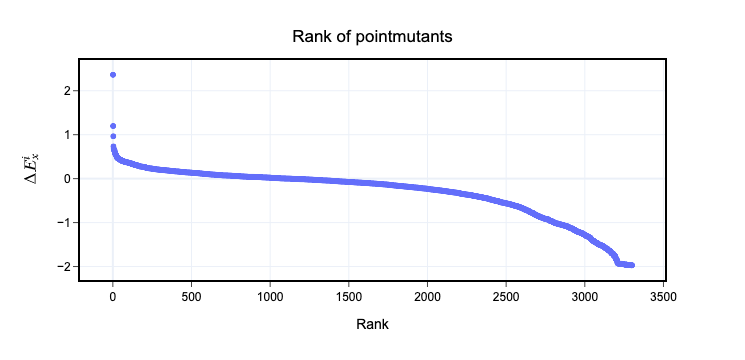

In [8]:
hras_RBD.rank_plotly(title='Rank of pointmutants')

Now display the rank of the positional mean.

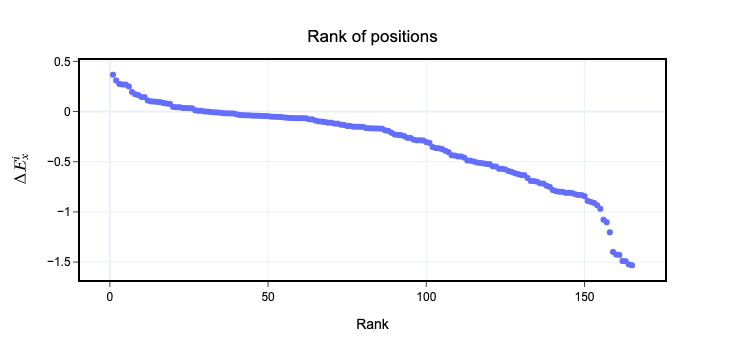

In [9]:
hras_RBD.rank_plotly(mode = 'mean', title='Rank of positions')

# Scatter

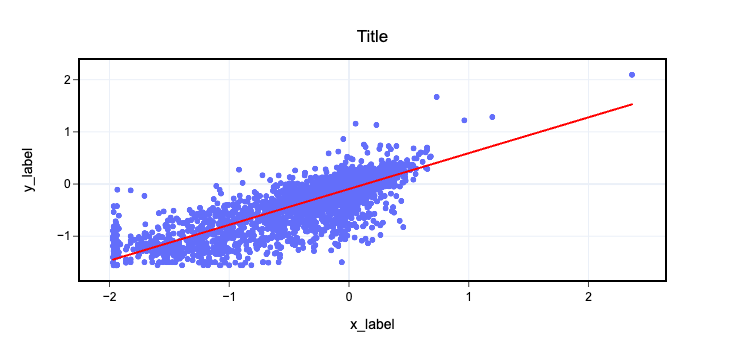

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6514.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:36:47   Log-Likelihood:                -467.84
No. Observations:                3292   AIC:                             939.7
Df Residuals:                    3290   BIC:                             951.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0948      0.006    -17.021      0.000      -0.106      -0.084
x1             0.6862      0.009     80.709      0.000       0.670       0.703
==============================================================================
Omnibus:                      326.926   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.623
Skew:                          -0.580   Prob(JB):                    5.16e-175
Kurtosis:                       5.123   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
hras_RBD.scatter_plotly(hras_GAPGEF, show_results = True)

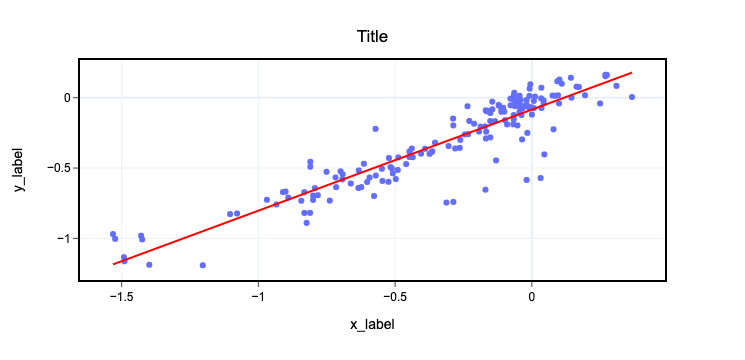

In [11]:
hras_RBD.scatter_plotly(hras_GAPGEF, mode='mean')